In [1]:
install.packages("SWMPr")

also installing the dependencies ‘bit’, ‘prettyunits’, ‘colorspace’, ‘sys’, ‘deldir’, ‘RcppEigen’, ‘bit64’, ‘progress’, ‘farver’, ‘labeling’, ‘munsell’, ‘viridisLite’, ‘fansi’, ‘pkgconfig’, ‘askpass’, ‘png’, ‘jpeg’, ‘interp’, ‘timechange’, ‘maps’, ‘clipr’, ‘hms’, ‘vroom’, ‘tzdb’, ‘stringi’, ‘gtable’, ‘isoband’, ‘scales’, ‘tibble’, ‘withr’, ‘curl’, ‘mime’, ‘openssl’, ‘R6’, ‘gsw’, ‘Rcpp’, ‘generics’, ‘magrittr’, ‘tidyselect’, ‘hexbin’, ‘latticeExtra’, ‘lubridate’, ‘mapproj’, ‘purrr’, ‘readr’, ‘plyr’, ‘stringr’, ‘cpp11’, ‘ggplot2’, ‘zoo’, ‘data.table’, ‘httr’, ‘gridExtra’, ‘oce’, ‘dplyr’, ‘openair’, ‘RColorBrewer’, ‘reshape2’, ‘suncalc’, ‘tictoc’, ‘tidyr’, ‘XML’





The downloaded binary packages are in
	/var/folders/d6/wbwc_vln55gdq4r3gw43_1h40000gn/T//RtmpsICWD2/downloaded_packages


In [11]:
library(SWMPr)

Loading required package: ggplot2



In [13]:
ls("package:SWMPr")

[1] "aggremetab"       "aggreswmp"        "all_params"       "all_params_dtrng"
 [5] "apacpnut"         "apacpwq"          "apadbwq"          "apaebmet"        
 [9] "calckl"           "cens_id"          "comb"             "decomp"          
[13] "decomp_cj"        "ecometab"         "import_local"     "map_reserve"     
[17] "metab_day"        "overplot"         "oxySol"           "param_names"     
[21] "parser"           "plot_metab"       "plot_quants"      "plot_summary"    
[25] "plot_wind"        "qaqc"             "qaqcchk"          "rem_reps"        
[29] "setstep"          "single_param"     "site_codes"       "site_codes_ind"  
[33] "smoother"         "stat_locs"        "swmpr"            "time_vec"

In [71]:
norcrcmet_path <- "/Users/aaronwilson/Downloads/NOCRCMET.csv"


In [73]:
nocr_met <- read.csv(norcrcmet_path, 
                     stringsAsFactors = FALSE, 
                     check.names = TRUE, 
                     row.names = NULL)


In [79]:
colnames(nocr_met)


[1] "row.names"     "Station_Code"  "isSWMP"        "m.d.y.hh.mm"  
 [5] "See.Legend"    "See.Legend.1"  "Frequency"     "See.Legend.2" 
 [9] "C"             "Flag.Code"     "X."            "Flag.Code.1"  
[13] "mb"            "Flag.Code.2"   "m.s"           "Flag.Code.3"  
[17] "m.s.1"         "Flag.Code.4"   "time"          "degrees"      
[21] "Flag.Code.5"   "sd"            "Flag.Code.6"   "millimoles.m2"
[25] "Flag.Code.7"   "mm"            "Flag.Code.8"

In [83]:
zb_eco_path <- "/Users/aaronwilson/Downloads/ZB_ECO_DATASET.csv"


In [85]:
zb_data <- read.csv(zb_eco_path, 
                    stringsAsFactors = FALSE, 
                    check.names = TRUE, 
                    row.names = NULL)


In [87]:
head(zb_data)


,row.names,Station_Code,isSWMP,m.d.y.hh.mm,See.Legend,See.Legend.1,See.Legend.2,C,Flag.Code.See.Legend,mS.cm,⋯,m,Flag.Code.See.Legend.5,m.1,Flag.Code.See.Legend.6,Units,Flag.Code.See.Legend.7,FNU.NTU,Flag.Code.See.Legend.8,ug.l,Flag.Code.See.Legend.9
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>
1,Station_Code,isSWMP,DateTimeStamp,Historical,ProvisionalPlus,F_Record,Temp,F_Temp,SpCond,F_SpCond,⋯,F_Depth,cDepth,F_cDepth,pH,F_pH,Turb,F_Turb,ChlFluor,F_ChlFluor,NA
2,noczbwq,P,08/01/2024 00:00,0,1,,29.6,<0>,17.10,<1> [CSM] (CCU),⋯,<0>,,<-1> [GCU],7.6,<0>,76,<0>,25.6,<0>,NA
3,noczbwq,P,08/01/2024 00:15,0,1,,29.5,<0>,17.28,<1> [CSM] (CCU),⋯,<0>,,<-1> [GCU],7.5,<0>,76,<0>,22.8,<0>,NA
4,noczbwq,P,08/01/2024 00:30,0,1,,29.4,<0>,17.48,<1> [CSM] (CCU),⋯,<0>,,<-1> [GCU],7.5,<0>,73,<0>,27.1,<0>,NA
5,noczbwq,P,08/01/2024 00:45,0,1,,29.3,<0>,17.62,<1> [CSM] (CCU),⋯,<0>,,<-1> [GCU],7.5,<0>,88,<0>,26.2,<0>,NA
6,noczbwq,P,08/01/2024 01:00,0,1,,29.2,<0>,17.50,<1> [CSM] (CCU),⋯,<0>,,<-1> [GCU],7.5,<0>,68,<0>,25.0,<0>,NA


In [89]:
str(zb_data)


'data.frame':	11809 obs. of  27 variables:
 $ row.names             : chr  "Station_Code" "noczbwq" "noczbwq" "noczbwq" ...
 $ Station_Code          : chr  "isSWMP" "P" "P" "P" ...
 $ isSWMP                : chr  "DateTimeStamp" "08/01/2024 00:00" "08/01/2024 00:15" "08/01/2024 00:30" ...
 $ m.d.y.hh.mm           : chr  "Historical" "0" "0" "0" ...
 $ See.Legend            : chr  "ProvisionalPlus" "1" "1" "1" ...
 $ See.Legend.1          : chr  "F_Record" "" "" "" ...
 $ See.Legend.2          : chr  "Temp" "29.6" "29.5" "29.4" ...
 $ C                     : chr  "F_Temp" "<0> " "<0> " "<0> " ...
 $ Flag.Code.See.Legend  : chr  "SpCond" "17.10" "17.28" "17.48" ...
 $ mS.cm                 : chr  "F_SpCond" "<1> [CSM] (CCU)" "<1> [CSM] (CCU)" "<1> [CSM] (CCU)" ...
 $ Flag.Code.See.Legend.1: chr  "Sal" "28.0" "28.2" "28.5" ...
 $ psu                   : chr  "F_Sal" "<1> [CSM] (CCU)" "<1> [CSM] (CCU)" "<1> [CSM] (CCU)" ...
 $ Flag.Code.See.Legend.2: chr  "DO_pct" "61.8" "60.6" "57.6" ...


In [91]:
colnames(zb_data)


[1] "row.names"              "Station_Code"           "isSWMP"                
 [4] "m.d.y.hh.mm"            "See.Legend"             "See.Legend.1"          
 [7] "See.Legend.2"           "C"                      "Flag.Code.See.Legend"  
[10] "mS.cm"                  "Flag.Code.See.Legend.1" "psu"                   
[13] "Flag.Code.See.Legend.2" "X."                     "Flag.Code.See.Legend.3"
[16] "mg.L"                   "Flag.Code.See.Legend.4" "m"                     
[19] "Flag.Code.See.Legend.5" "m.1"                    "Flag.Code.See.Legend.6"
[22] "Units"                  "Flag.Code.See.Legend.7" "FNU.NTU"               
[25] "Flag.Code.See.Legend.8" "ug.l"                   "Flag.Code.See.Legend.9"

In [93]:
zb_eco_path <- "/Users/aaronwilson/Downloads/ZB_ECO_DATASET.csv"

zb_data <- read.csv(zb_eco_path, stringsAsFactors = FALSE, check.names = TRUE, row.names = NULL)

zb_data <- zb_data[, c("m.d.y.hh.mm", "C", "psu", "mg.L", "ug.l")]
colnames(zb_data) <- c("DateTimeStamp", "Water_Temp_C", "Salinity", "DO_mg_L", "Chlorophyll_a")

zb_data$DateTimeStamp <- as.POSIXct(zb_data$DateTimeStamp, format = "%m/%d/%Y %H:%M", tz = "GMT")


In [95]:
norcrcmet_path <- "/Users/aaronwilson/Downloads/NOCRCMET.csv"

nocr_met <- read.csv(norcrcmet_path, stringsAsFactors = FALSE, check.names = TRUE, row.names = NULL)

nocr_met <- nocr_met[, c("m.d.y.hh.mm", "C", "m.s", "mb")]
colnames(nocr_met) <- c("DateTimeStamp", "Air_Temp_C", "Wind_Speed_mps", "Barometric_Pressure_mb")

nocr_met$DateTimeStamp <- as.POSIXct(nocr_met$DateTimeStamp, format = "%m/%d/%Y %H:%M", tz = "GMT")

In [97]:
head(zb_data)
str(zb_data)

head(nocr_met)
str(nocr_met)


,DateTimeStamp,Water_Temp_C,Salinity,DO_mg_L,Chlorophyll_a
,<dttm>,<chr>,<chr>,<chr>,<chr>
1,NA,F_Temp,F_Sal,F_DO_mgl,F_ChlFluor
2,NA,<0>,<1> [CSM] (CCU),<0>,<0>
3,NA,<0>,<1> [CSM] (CCU),<0>,<0>
4,NA,<0>,<1> [CSM] (CCU),<0>,<0>
5,NA,<0>,<1> [CSM] (CCU),<0>,<0>
6,NA,<0>,<1> [CSM] (CCU),<0>,<0>


'data.frame':	11809 obs. of  5 variables:
 $ DateTimeStamp: POSIXct, format: NA NA ...
 $ Water_Temp_C : chr  "F_Temp" "<0> " "<0> " "<0> " ...
 $ Salinity     : chr  "F_Sal" "<1> [CSM] (CCU)" "<1> [CSM] (CCU)" "<1> [CSM] (CCU)" ...
 $ DO_mg_L      : chr  "F_DO_mgl" "<0> " "<0> " "<0> " ...
 $ Chlorophyll_a: chr  "F_ChlFluor" "<0> " "<0> " "<0> " ...


,DateTimeStamp,Air_Temp_C,Wind_Speed_mps,Barometric_Pressure_mb
,<dttm>,<chr>,<chr>,<chr>
1,NA,F_ATemp,F_WSpd,F_BP
2,NA,<0>,<0>,<0>
3,NA,<0>,<0>,<0>
4,NA,<0>,<0>,<0>
5,NA,<0>,<0>,<0>
6,NA,<0>,<0>,<0>


'data.frame':	11809 obs. of  4 variables:
 $ DateTimeStamp         : POSIXct, format: NA NA ...
 $ Air_Temp_C            : chr  "F_ATemp" "<0> " "<0> " "<0> " ...
 $ Wind_Speed_mps        : chr  "F_WSpd" "<0> " "<0> " "<0> " ...
 $ Barometric_Pressure_mb: chr  "F_BP" "<0> " "<0> " "<0> " ...


In [109]:
head(nocr_met)
str(nocr_met)

head(zb_data)
str(zb_data)


,DateTimeStamp,Air_Temp_C,Wind_Speed_mps,Barometric_Pressure_mb
,<dttm>,<chr>,<chr>,<chr>
1,NA,F_ATemp,F_WSpd,F_BP
2,NA,<0>,<0>,<0>
3,NA,<0>,<0>,<0>
4,NA,<0>,<0>,<0>
5,NA,<0>,<0>,<0>
6,NA,<0>,<0>,<0>


'data.frame':	11809 obs. of  4 variables:
 $ DateTimeStamp         : POSIXct, format: NA NA ...
 $ Air_Temp_C            : chr  "F_ATemp" "<0> " "<0> " "<0> " ...
 $ Wind_Speed_mps        : chr  "F_WSpd" "<0> " "<0> " "<0> " ...
 $ Barometric_Pressure_mb: chr  "F_BP" "<0> " "<0> " "<0> " ...


,DateTimeStamp,Water_Temp_C,Salinity,DO_mg_L,Chlorophyll_a
,<dttm>,<chr>,<chr>,<chr>,<chr>
1,NA,F_Temp,F_Sal,F_DO_mgl,F_ChlFluor
2,NA,<0>,<1> [CSM] (CCU),<0>,<0>
3,NA,<0>,<1> [CSM] (CCU),<0>,<0>
4,NA,<0>,<1> [CSM] (CCU),<0>,<0>
5,NA,<0>,<1> [CSM] (CCU),<0>,<0>
6,NA,<0>,<1> [CSM] (CCU),<0>,<0>


'data.frame':	11809 obs. of  5 variables:
 $ DateTimeStamp: POSIXct, format: NA NA ...
 $ Water_Temp_C : chr  "F_Temp" "<0> " "<0> " "<0> " ...
 $ Salinity     : chr  "F_Sal" "<1> [CSM] (CCU)" "<1> [CSM] (CCU)" "<1> [CSM] (CCU)" ...
 $ DO_mg_L      : chr  "F_DO_mgl" "<0> " "<0> " "<0> " ...
 $ Chlorophyll_a: chr  "F_ChlFluor" "<0> " "<0> " "<0> " ...


In [149]:
install.packages("SWMPr")

library(SWMPr)



The downloaded binary packages are in
	/var/folders/d6/wbwc_vln55gdq4r3gw43_1h40000gn/T//RtmpsICWD2/downloaded_packages


In [171]:
norcrcmet_path <- "/Users/aaronwilson/Downloads/NOCRCMET.csv"
zb_eco_path <- "/Users/aaronwilson/Downloads/ZB_ECO_DATASET.csv"

import pandas as pd

zb_eco_data = pd.read_csv("path_to_zb_eco_dataset.csv")
nocrcmet_data = pd.read_csv("path_to_nocrcmet.csv")

zb_eco_data = zb_eco_data.rename(columns={
    "m/d/y hh:mm": "DateTimeStamp",
    "mg/L": "DO_mgl",
    "m": "Depth",
    "psu": "Sal",
    "C": "Temp"
})[["DateTimeStamp", "DO_mgl", "Depth", "Temp", "Sal"]]

nocrcmet_data = nocrcmet_data.rename(columns={
    "m/d/y hh:mm": "DateTimeStamp",
    "C": "ATemp",
    "m/s": "WSpd",
    "mb": "BP"
})[["DateTimeStamp", "ATemp", "WSpd", "BP"]]

zb_eco_data["DateTimeStamp"] = pd.to_datetime(zb_eco_data["DateTimeStamp"], format="%m/%d/%Y %H:%M", errors="coerce")
nocrcmet_data["DateTimeStamp"] = pd.to_datetime(nocrcmet_data["DateTimeStamp"], format="%m/%d/%Y %H:%M", errors="coerce")

nocrcmet_data["DateTimeStamp"] = nocrcmet_data["DateTimeStamp"] + pd.DateOffset(years=1)

merged_data = pd.merge(zb_eco_data, nocrcmet_data, on="DateTimeStamp", how="inner")

merged_data.to_csv("merged_ecosystem_metabolism_data.csv", index=False)



In [199]:
library(SWMPr)
library(readr)

data_path <- "/Users/aaronwilson/Downloads/merged_ecosystem_metabolism_data.csv"
prepared_data <- read_csv(data_path)


colnames(prepared_data) <- c("datetimestamp", "do_mgl", "depth", "atemp", "sal", "temp", "wspd", "bp")

# Convert the datetimestamp column to POSIXct format
prepared_data$datetimestamp <- as.POSIXct(prepared_data$datetimestamp, format = "%Y-%m-%d %H:%M:%S", tz = "America/New_York")

# Run ecometab function
results <- ecometab(
  dat_in = prepared_data,    # Input dataset
  tz = "America/New_York",   # Timezone
  lat = 33.954680,           # Latitude
  long = -77.934807,         # Longitude
  metab_units = "mmol"       # Output units
)

print(results)

plot_metab(results)


Rows: 11808 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (7): do_mgl, depth, atemp, sal, temp, wspd, bp
dttm (1): datetimestamp

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


          date         DOF_d           D_d         DOF_n        D_n          Pg
1   2024-07-31            NA            NA            NA         NA          NA
2   2024-08-01 -1.218951e+01  -1.022645447  1.731365e+01 1.24095901 -376.344720
3   2024-08-02 -1.111396e+01   0.603130502  1.442804e+01 0.55336400 -352.903437
4   2024-08-03 -1.075545e+01   0.088095577  7.214021e+00 2.90560502 -208.537279
5   2024-08-04  1.434060e+00  -0.156545726 -1.770264e-16 0.20307505   24.637699
6   2024-08-05  3.585150e+00  -0.470769599 -4.328413e+00 0.27696204  118.734311
7   2024-08-06  2.509605e+00   0.596905382 -1.635178e+01 1.35230917  268.374027
8   2024-08-07 -9.321389e+00   4.235809233  2.837515e+01 2.61539693 -536.785592
9   2024-08-08 -7.303083e-01   0.197043133 -9.389678e-01 0.26318340    3.743842
10  2024-08-09 -6.207620e+00   1.212113341  5.633807e+00 0.98506014 -164.074345
11  2024-08-10  2.556079e+00   0.760818728  3.286387e+00 0.51067820  -13.300878
12  2024-08-11 -7.303083e+00   0.1284361

ERROR: Error in UseMethod("plot_metab"): no applicable method for 'plot_metab' applied to an object of class "data.frame"


In [14]:
colnames(results)


[1] "date"  "DOF_d" "D_d"   "DOF_n" "D_n"   "Pg"    "Rt"    "NEM"

In [18]:
colnames(results)[which(colnames(results) == "date")] <- "datetimestamp"


In [20]:
head(results)


,datetimestamp,DOF_d,D_d,DOF_n,D_n,Pg,Rt,NEM
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2024-07-31,NA,NA,NA,NA,NA,NA,NA
2,2024-08-01,-12.18951,-1.02264545,1.731365e+01,1.2409590,-376.3447,385.744589,9.399870
3,2024-08-02,-11.11396,0.60313050,1.442804e+01,0.5533640,-352.9034,332.992269,-19.911168
4,2024-08-03,-10.75545,0.08809558,7.214021e+00,2.9056050,-208.5373,103.401982,-105.135297
5,2024-08-04,1.43406,-0.15654573,-1.770264e-16,0.2030751,24.6377,-4.873801,19.763898
6,2024-08-05,3.58515,-0.47076960,-4.328413e+00,0.2769620,118.7343,-110.528990,8.205321


Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_line()`).”


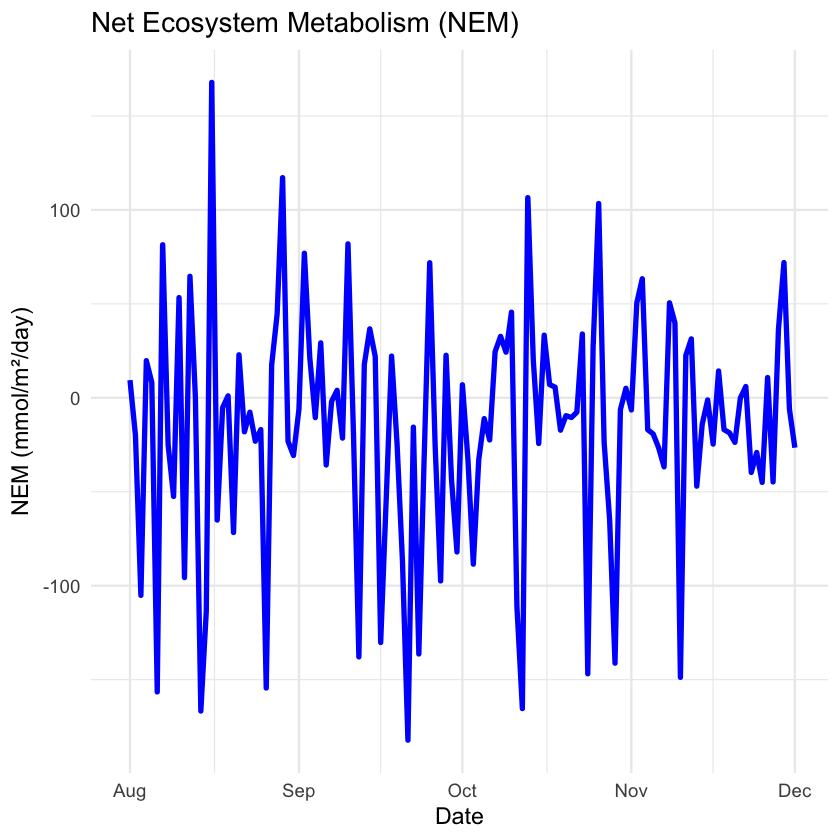

In [30]:
ggplot(results, aes(x = datetimestamp, y = NEM)) +
  geom_line(color = "blue", linewidth = 1.5) +
  labs(
    title = "Net Ecosystem Metabolism (NEM)",
    x = "Date",
    y = "NEM (mmol/m²/day)"
  ) +
  theme_minimal(base_size = 14)

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_line()`).”


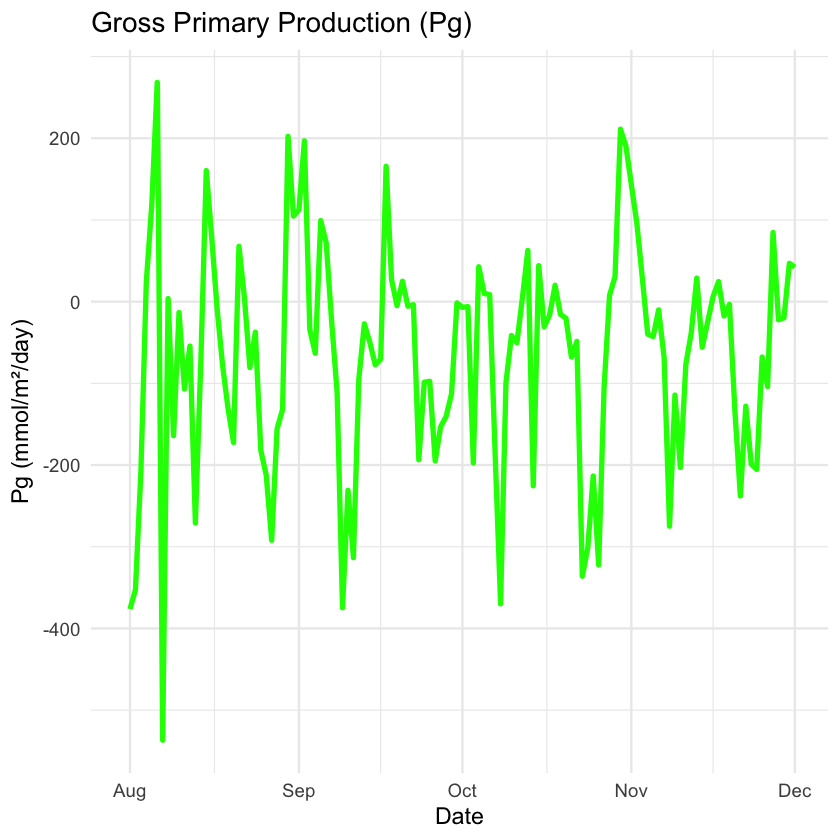

In [32]:
ggplot(results, aes(x = datetimestamp, y = Pg)) +
  geom_line(color = "green", linewidth = 1.5) +
  labs(
    title = "Gross Primary Production (Pg)",
    x = "Date",
    y = "Pg (mmol/m²/day)"
  ) +
  theme_minimal(base_size = 14)


Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_line()`).”


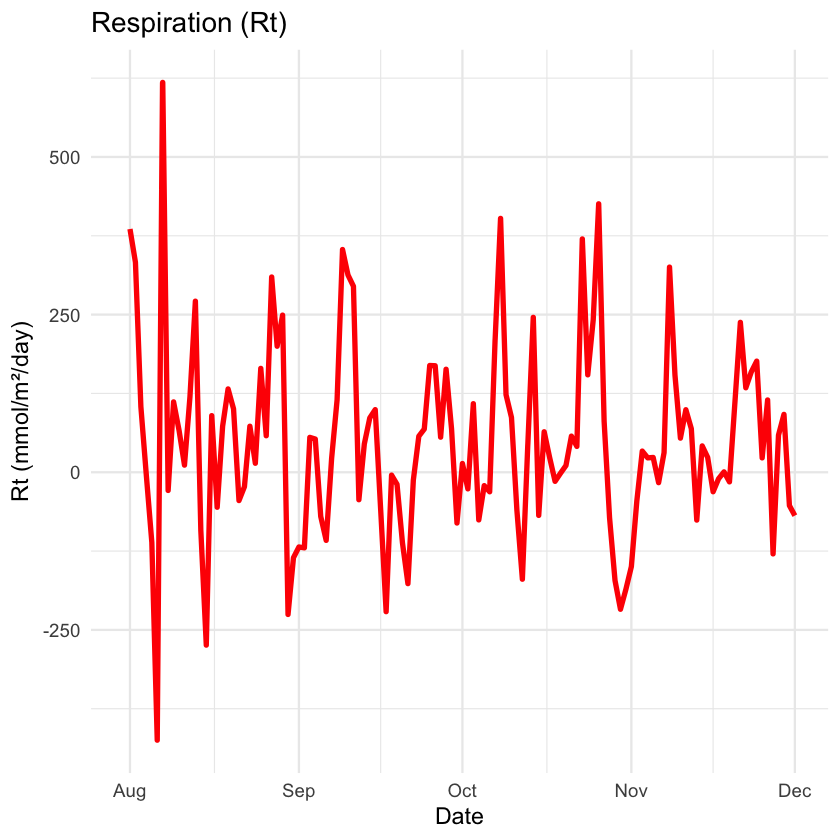

In [34]:
ggplot(results, aes(x = datetimestamp, y = Rt)) +
  geom_line(color = "red", linewidth = 1.5) +
  labs(
    title = "Respiration (Rt)",
    x = "Date",
    y = "Rt (mmol/m²/day)"
  ) +
  theme_minimal(base_size = 14)


Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_line()`).”


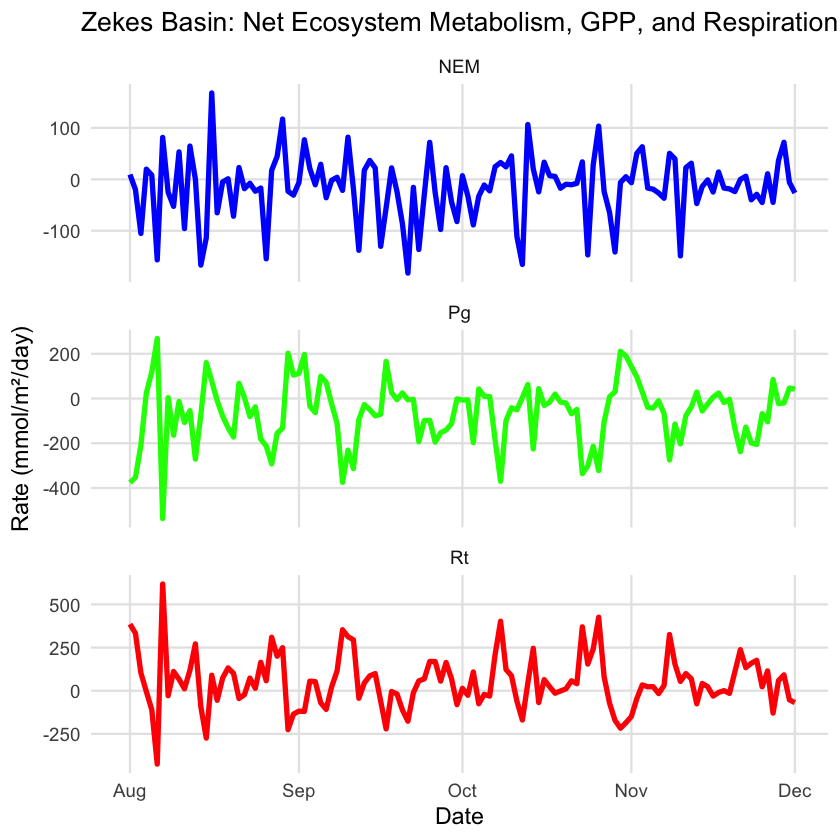

In [42]:
library(ggplot2)
library(tidyr)

# Reshape data to long format
results_long <- results %>%
  pivot_longer(
    cols = c(NEM, Pg, Rt), 
    names_to = "Variable", 
    values_to = "Value"
  )

# Plot with facets
ggplot(results_long, aes(x = datetimestamp, y = Value, color = Variable)) +
  geom_line(linewidth = 1.5) +
  labs(
    title = "Zekes Basin: Net Ecosystem Metabolism, GPP, and Respiration",
    x = "Date",
    y = "Rate (mmol/m²/day)"
  ) +
  theme_minimal(base_size = 14) +
  theme(
    plot.title = element_text(hjust = 0.5, size = 16),
    panel.grid.major = element_line(color = "gray90"),
    panel.grid.minor = element_blank(),
    legend.position = "none" 
  ) +
  facet_wrap(~Variable, ncol = 1, scales = "free_y") + 
  scale_color_manual(
    values = c(
      "NEM" = "blue",
      "Pg" = "green",
      "Rt" = "red"
    )
  )

ggsave("stacked_wide_plot.png", width = 14, height = 8, dpi = 300)


In [36]:
dir.create("C:/Users/aaronwilson/downloads", showWarnings = FALSE)
ggsave("stacked_wide_plot.png", plot = last_plot(), path = "C:/Users/aaronwilson/downloads", width = 8, height = 6, dpi = 300)
